In [1]:
import pandas as pd

In [2]:
titanic=pd.read_csv('data/titanic.csv')
titanic['age']=titanic['age'].replace(['?'],[None]).astype('float')
titanic['fare']=titanic['fare'].replace(['?'],[None]).astype('float')

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      1309 non-null   object 
 10  embarked   1309 non-null   object 
 11  boat       1309 non-null   object 
 12  body       1309 non-null   object 
 13  home.dest  1309 non-null   object 
dtypes: float64(2), int64(4), object(8)
memory usage: 143.3+ KB


In [4]:
def yr_to_days(yrs):
    return yrs*365
titanic['age'].apply(yr_to_days)

0       10585.0000
1         334.5955
2         730.0000
3       10950.0000
4        9125.0000
           ...    
1304     5292.5000
1305           NaN
1306     9672.5000
1307     9855.0000
1308    10585.0000
Name: age, Length: 1309, dtype: float64

In [5]:
titanic['age']*365

0       10585.0000
1         334.5955
2         730.0000
3       10950.0000
4        9125.0000
           ...    
1304     5292.5000
1305           NaN
1306     9672.5000
1307     9855.0000
1308    10585.0000
Name: age, Length: 1309, dtype: float64

In [6]:
titanic['age']

0       29.0000
1        0.9167
2        2.0000
3       30.0000
4       25.0000
         ...   
1304    14.5000
1305        NaN
1306    26.5000
1307    27.0000
1308    29.0000
Name: age, Length: 1309, dtype: float64

In [7]:
def get_age_grp(yrs):
    if yrs<=2:
        return "Infant"
    elif yrs<=18:
        return "Teen"
    elif yrs<60:
        return "Adult"
    else:
        return "Senior"
titanic['age_grp']=titanic['age'].apply(get_age_grp)

In [8]:
titanic.groupby(['age_grp','sex'])['survived'].mean()

age_grp  sex   
Adult    female    0.771930
         male      0.189394
Infant   female    0.625000
         male      0.611111
Senior   female    0.629213
         male      0.135514
Teen     female    0.697368
         male      0.253012
Name: survived, dtype: float64

<AxesSubplot:xlabel='age_grp'>

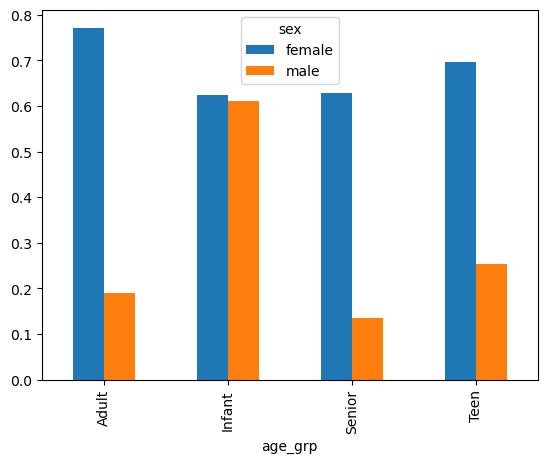

In [9]:
titanic.groupby(['age_grp','sex'])['survived'].mean().unstack().plot(kind='bar')

In [10]:
titanic['fare'].apply(lambda x:f"${x*24}")

0                   $5072.1
1       $3637.2000000000003
2       $3637.2000000000003
3       $3637.2000000000003
4       $3637.2000000000003
               ...         
1304              $346.9008
1305              $346.9008
1306    $173.39999999999998
1307    $173.39999999999998
1308                 $189.0
Name: fare, Length: 1309, dtype: object

In [11]:
def current_value(nums,multiplier):
    return f'${nums*multiplier}'
titanic['fare'].apply(current_value, args=(24,))

0                   $5072.1
1       $3637.2000000000003
2       $3637.2000000000003
3       $3637.2000000000003
4       $3637.2000000000003
               ...         
1304              $346.9008
1305              $346.9008
1306    $173.39999999999998
1307    $173.39999999999998
1308                 $189.0
Name: fare, Length: 1309, dtype: object

In [12]:
df=titanic[['age','survived','pclass','fare']]

In [13]:
df

,age,survived,pclass,fare
0,29.0000,1,1,211.3375
1,0.9167,1,1,151.5500
2,2.0000,0,1,151.5500
3,30.0000,0,1,151.5500
4,25.0000,0,1,151.5500
...,...,...,...,...
1304,14.5000,0,3,14.4542
1305,NaN,0,3,14.4542
1306,26.5000,0,3,7.2250
1307,27.0000,0,3,7.2250


In [14]:
def get_range(s):
    return s.max() - s.min()
df.apply(get_range)

age          79.8333
survived      1.0000
pclass        2.0000
fare        512.3292
dtype: float64

In [15]:
def get_range(s):
    return s.max() - s.min()
df.apply(get_range, axis=1)

0       210.3375
1       150.6333
2       151.5500
3       151.5500
4       151.5500
          ...   
1304     14.5000
1305     14.4542
1306     26.5000
1307     27.0000
1308     29.0000
Length: 1309, dtype: float64

In [16]:
df

,age,survived,pclass,fare
0,29.0000,1,1,211.3375
1,0.9167,1,1,151.5500
2,2.0000,0,1,151.5500
3,30.0000,0,1,151.5500
4,25.0000,0,1,151.5500
...,...,...,...,...
1304,14.5000,0,3,14.4542
1305,NaN,0,3,14.4542
1306,26.5000,0,3,7.2250
1307,27.0000,0,3,7.2250


In [17]:
def fam_size(s):
    nums = s.sibsp + s.parch
    if nums==0:
        return "Solo"
    elif nums<5:
        return "Average Family"
    else:
        return "Large Family"
titanic.apply(fam_size, axis=1)

0                 Solo
1       Average Family
2       Average Family
3       Average Family
4       Average Family
             ...      
1304    Average Family
1305    Average Family
1306              Solo
1307              Solo
1308              Solo
Length: 1309, dtype: object

In [18]:
titanic['fam_size']=titanic.apply(fam_size, axis=1)

In [19]:
titanic.groupby(['fam_size'])['age'].mean()

fam_size
Average Family    28.877258
Large Family      18.790000
Solo              31.511864
Name: age, dtype: float64

In [20]:
titanic['fam_size'].value_counts()

Solo              790
Average Family    459
Large Family       60
Name: fam_size, dtype: int64

In [21]:
titanic['pclass'].rename({1:"1st"})

0       1
1st     1
2       1
3       1
4       1
       ..
1304    3
1305    3
1306    3
1307    3
1308    3
Name: pclass, Length: 1309, dtype: int64

<AxesSubplot:ylabel='pclass'>

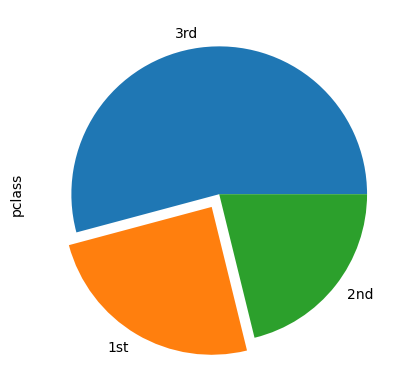

In [22]:
titanic['pclass'].map({1:"1st",2:"2nd",3:"3rd"}).value_counts().plot(kind='pie', explode=(0,0.1,0))

In [23]:
titanic[['name','home.dest','sex']].applymap(str.upper)

,name,home.dest,sex
0,"ALLEN, MISS. ELISABETH WALTON","ST LOUIS, MO",FEMALE
1,"ALLISON, MASTER. HUDSON TREVOR","MONTREAL, PQ / CHESTERVILLE, ON",MALE
2,"ALLISON, MISS. HELEN LORAINE","MONTREAL, PQ / CHESTERVILLE, ON",FEMALE
3,"ALLISON, MR. HUDSON JOSHUA CREIGHTON","MONTREAL, PQ / CHESTERVILLE, ON",MALE
4,"ALLISON, MRS. HUDSON J C (BESSIE WALDO DANIELS)","MONTREAL, PQ / CHESTERVILLE, ON",FEMALE
...,...,...,...
1304,"ZABOUR, MISS. HILENI",?,FEMALE
1305,"ZABOUR, MISS. THAMINE",?,FEMALE
1306,"ZAKARIAN, MR. MAPRIEDEDER",?,MALE
1307,"ZAKARIAN, MR. ORTIN",?,MALE


In [24]:
df.applymap(lambda a:a * 7)

,age,survived,pclass,fare
0,203.0000,7,7,1479.3625
1,6.4169,7,7,1060.8500
2,14.0000,0,7,1060.8500
3,210.0000,0,7,1060.8500
4,175.0000,0,7,1060.8500
...,...,...,...,...
1304,101.5000,0,21,101.1794
1305,NaN,0,21,101.1794
1306,185.5000,0,21,50.5750
1307,189.0000,0,21,50.5750


In [25]:
s1=pd.Series(['a','b','c'])

In [26]:
s2=pd.Series(['a','de','f'])

In [27]:
pd.concat([s1,s2])

0     a
1     b
2     c
0     a
1    de
2     f
dtype: object

In [28]:
pd.concat([s1,s2], ignore_index=True)

0     a
1     b
2     c
3     a
4    de
5     f
dtype: object

In [37]:
fruits = pd.Series(['apple','banana','cherry'], index=['a','b','c'])

In [38]:
fruits

a     apple
b    banana
c    cherry
dtype: object

In [51]:
animals = pd.Series(['anaconda','badger','cougar','pike','human'], index=['a','b','c','p','h'])

In [53]:
animals

a    anaconda
b      badger
c      cougar
p        pike
h       human
dtype: object

In [62]:
pd.concat([fruits,animals], keys=['fruits','animals'])
# Hierarchy Indexing

fruits   a       apple
         b      banana
         c      cherry
animals  a    anaconda
         b      badger
         c      cougar
         p        pike
         h       human
dtype: object

In [63]:
pd.concat([fruits,animals], axis=1, keys=['fruits','animals'])

,fruits,animals
a,apple,anaconda
b,banana,badger
c,cherry,cougar
p,NaN,pike
h,NaN,human


In [65]:
pd.concat([fruits,animals], axis=1, join='inner')

,0,1
a,apple,anaconda
b,banana,badger
c,cherry,cougar


In [66]:
harvest_21 = pd.DataFrame(
    [['potatoes', 900], ['garlic', 1350], ['onions', 875]], 
    columns=['crop', 'qty']
)

harvest_22 = pd.DataFrame(
    [['garlic', 1600], ['spinach', 560], ['turnips', 999], ['onions', 1000]], 
    columns=['crop', 'qty']
)

In [70]:
harvest_21

,crop,qty
0,potatoes,900
1,garlic,1350
2,onions,875


In [71]:
harvest_22

,crop,qty
0,garlic,1600
1,spinach,560
2,turnips,999
3,onions,1000


In [73]:
pd.concat([harvest_21,harvest_22], axis=1, join='outer')

,crop,qty,crop,qty
0,potatoes,900.0,garlic,1600
1,garlic,1350.0,spinach,560
2,onions,875.0,turnips,999
3,NaN,NaN,onions,1000


In [74]:
harvest_23 = pd.DataFrame(
    [['potatoes', 900, 500], ['garlic', 1350, 1200], ['onions', 875, 950]], 
    columns=['crop', 'qty', 'profit']
)

In [75]:
harvest_23

,crop,qty,profit
0,potatoes,900,500
1,garlic,1350,1200
2,onions,875,950


In [89]:
pd.concat([harvest_21,harvest_22, harvest_23],keys=['2021','2022','2023'],  axis=0)

crop   qty  profit
2021 0  potatoes   900     NaN
     1    garlic  1350     NaN
     2    onions   875     NaN
2022 0    garlic  1600     NaN
     1   spinach   560     NaN
     2   turnips   999     NaN
     3    onions  1000     NaN
2023 0  potatoes   900   500.0
     1    garlic  1350  1200.0
     2    onions   875   950.0

In [90]:
livestock = pd.DataFrame(
    [['pasture', 9], ['stable', 3], ['coop', 34]], 
    columns=['location', 'qty'],
    index=['alpaca', 'horse', 'chicken']
)
weights = pd.DataFrame(
    [[4,10], [900, 2000], [1.2, 4], [110, 150]], 
    columns=['min_weight', 'max_weight'],
    index=['chicken', 'horse', 'duck', 'alpaca']
)

In [91]:
livestock

,location,qty
alpaca,pasture,9
horse,stable,3
chicken,coop,34


In [92]:
weights

,min_weight,max_weight
chicken,4.0,10
horse,900.0,2000
duck,1.2,4
alpaca,110.0,150


In [95]:
pd.concat([livestock, weights], axis=1)

,location,qty,min_weight,max_weight
alpaca,pasture,9.0,110.0,150
horse,stable,3.0,900.0,2000
chicken,coop,34.0,4.0,10
duck,NaN,NaN,1.2,4


In [96]:
pd.concat([livestock, weights], axis=1, join='inner')

,location,qty,min_weight,max_weight
alpaca,pasture,9,110.0,150
horse,stable,3,900.0,2000
chicken,coop,34,4.0,10


In [97]:
teams = pd.DataFrame(
    [
        ["Suns", "Phoenix", 20, 4], 
        ["Mavericks", "Dallas", 11,12], 
        ["Rockets", "Houston", 7, 16],
        ['Nuggets', "Denver", 11, 12]
    ], 
    columns=["team", "city", "wins", "losses"]
)

cities = pd.DataFrame(
    [
        ["Houston", "Texas", 2310000], 
        ["Phoenix", "Arizona", 1630000], 
        ["San Diego", "California", 1410000],
        ["Dallas", "Texas", 1310000]
    ],
    columns=["city", "state", "population"]
)

In [98]:
teams

,team,city,wins,losses
0,Suns,Phoenix,20,4
1,Mavericks,Dallas,11,12
2,Rockets,Houston,7,16
3,Nuggets,Denver,11,12


In [99]:
cities

,city,state,population
0,Houston,Texas,2310000
1,Phoenix,Arizona,1630000
2,San Diego,California,1410000
3,Dallas,Texas,1310000


In [104]:
teams.merge(cities, how='cross')

,team,city_x,wins,losses,city_y,state,population
0,Suns,Phoenix,20,4,Houston,Texas,2310000
1,Suns,Phoenix,20,4,Phoenix,Arizona,1630000
2,Suns,Phoenix,20,4,San Diego,California,1410000
3,Suns,Phoenix,20,4,Dallas,Texas,1310000
4,Mavericks,Dallas,11,12,Houston,Texas,2310000
5,Mavericks,Dallas,11,12,Phoenix,Arizona,1630000
6,Mavericks,Dallas,11,12,San Diego,California,1410000
7,Mavericks,Dallas,11,12,Dallas,Texas,1310000
8,Rockets,Houston,7,16,Houston,Texas,2310000
9,Rockets,Houston,7,16,Phoenix,Arizona,1630000


In [105]:
midterms = pd.DataFrame(
    [['alex', 'padilla', 92], ['rayna', 'wilson', 83], ['juan', 'gomez', 78], ['angela', 'smith', 66],['stephen', 'yu', 98]], 
    columns=['first', 'last', 'score']
)
finals = pd.DataFrame(
    [['alex','padilla', 97, False], ['rayna', 'wilson', 88, False], ['alex', 'smith', 86, True], ['juan', 'gomez', 71, True], ['stephen', 'yu', 78, False], ['sakura', 'steel', 100, True]], 
    columns=['first', 'last','score', 'extra_credit']
)


In [106]:
midterms

,first,last,score
0,alex,padilla,92
1,rayna,wilson,83
2,juan,gomez,78
3,angela,smith,66
4,stephen,yu,98


In [107]:
finals

,first,last,score,extra_credit
0,alex,padilla,97,False
1,rayna,wilson,88,False
2,alex,smith,86,True
3,juan,gomez,71,True
4,stephen,yu,78,False
5,sakura,steel,100,True


In [114]:
pd.concat([finals,midterms], keys=["Finals","Midterms"])

first     last  score extra_credit
Finals   0     alex  padilla     97        False
         1    rayna   wilson     88        False
         2     alex    smith     86         True
         3     juan    gomez     71         True
         4  stephen       yu     78        False
         5   sakura    steel    100         True
Midterms 0     alex  padilla     92          NaN
         1    rayna   wilson     83          NaN
         2     juan    gomez     78          NaN
         3   angela    smith     66          NaN
         4  stephen       yu     98          NaN

In [124]:
midterms.merge(finals, on=['first','last'], how='outer')

,first,last,score_x,score_y,extra_credit
0,alex,padilla,92.0,97.0,False
1,rayna,wilson,83.0,88.0,False
2,juan,gomez,78.0,71.0,True
3,angela,smith,66.0,NaN,NaN
4,stephen,yu,98.0,78.0,False
5,alex,smith,NaN,86.0,True
6,sakura,steel,NaN,100.0,True


In [125]:
midterms.merge(finals, on=['first','last'], how='inner', suffixes=['_midterms','_finals'])

,first,last,score_midterms,score_finals,extra_credit
0,alex,padilla,92,97,False
1,rayna,wilson,83,88,False
2,juan,gomez,78,71,True
3,stephen,yu,98,78,False
